1.(a) Use the commands “rep” and “seq” to create the vector: 

0000011111222223333344444

In [1]:
print(rep(seq(1, 5, by = 1) - 1, each = 5))

 [1] 0 0 0 0 0 1 1 1 1 1 2 2 2 2 2 3 3 3 3 3 4 4 4 4 4


+ 先令 x 使用`seq()`生成一組 0, 1, 2, 3, 4 的數列，再配合`rep()`重複這數
列內每一個數字各五次，即可得到所求。

1.(b) Similar to (a), create the following vector:

1 2 3 4 5 2 3 4 5 6 3 4 5 6 7 4 5 6 7 8 5 6 7 8 9

In [2]:
print(seq(1, 5, by = 1) + rep(0:4, each = 5))

 [1] 1 2 3 4 5 2 3 4 5 6 3 4 5 6 7 4 5 6 7 8 5 6 7 8 9


+ 先使用`seq()`生成 1, 2, 3, 4, 5 的數列，再使用`rep()`去生成 0 ~ 4 每個數字重複五次的數列，兩個相加後，1 ~ 5 會配合 0 ~ 4 的長度去不斷重複的與 0 ~ 4 相加，即可得到所求。

1.(c) Use “rep” and “seq” to create the following vector:

red, yellow, blue, yellow, blue, green

blue, green, magenta, green, magenta, cyan

In [3]:
colors = c("red", "yellow", "blue", "green", "magenta", "cyan") 
colors = colors[seq(1, 3) + rep(0:3, each = 3)]
print(colors)

 [1] "red"     "yellow"  "blue"    "yellow"  "blue"    "green"   "blue"   
 [8] "green"   "magenta" "green"   "magenta" "cyan"   


+ 先建立一個顏色的向量，按照規律出現的方式排列，由於`seq()`, `rep()`無法
作用在 character 上，所以我們要先建立一個顏色名稱的向量，然後用 index 去把顏色提取出來，指標的寫法如同前兩題，即可得到所求。


2.(a) Write a function to calculate the minimum distance between any two points in the region (0, 1) x (0, 1). Randomly generate 20 points from (0, 1) x (0, 1), and then use the function you wrote to calculate the minimum distance.

In [4]:
x_r = runif(20)
y_r = runif(20) 
print(data.frame(x = x_r, y = y_r) )
distance = function(x, y){
  sqrt(x**2 + y**2)
}

x <- c()
y <- c() 
min_dist <- c() 
for (i in 1:19){
    x <- x_r[i] - x_r[(i + 1):20]
    y <- y_r[i] - y_r[(i + 1):20] 
    min_dist[i] = min(distance(x, y))
}

cat("the minimum distance:", min(min_dist))

            x          y
1  0.53250225 0.61671615
2  0.02674085 0.85527676
3  0.68775839 0.87694619
4  0.95262010 0.35299520
5  0.44234337 0.23555613
6  0.99506542 0.68925861
7  0.24436478 0.35654466
8  0.14671478 0.22886720
9  0.37829255 0.48395845
10 0.95832408 0.49035576
11 0.60257029 0.36155706
12 0.14357131 0.97903148
13 0.67421282 0.04063076
14 0.84583695 0.91460002
15 0.25557892 0.79017936
16 0.63045439 0.58874598
17 0.18718009 0.44399593
18 0.15945481 0.37487617
19 0.86277113 0.37683688
20 0.67768658 0.46847975
the minimum distance: 0.07447303

2.(b) Use the function “plot” to create scatter plot for the data in (a), restricting the domain in (0, 1) x (0, 1). Also, divide the region into 4 equal-area sub-regions and plot the 20 points according to which region they lie.


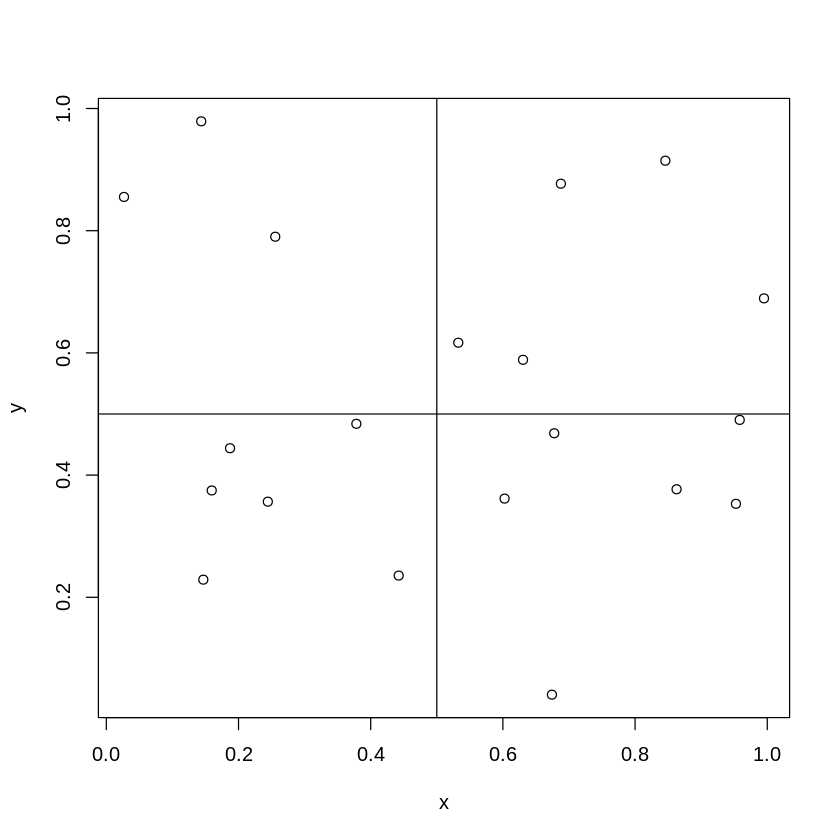

In [5]:
plot(x_r, y_r, type = "p", xlab = "x", ylab = "y") 
abline(h = 0.5)
abline(v = 0.5)

+ 把 (a) 生成的點在圖上畫出來，在 x, y = 0.5 的地方標上直線，即可平均
切割四塊等大面積的區塊，包含所有的點。

2.(c) Explore the function “symbols” and explain what it does. Experiment this function and output the result.

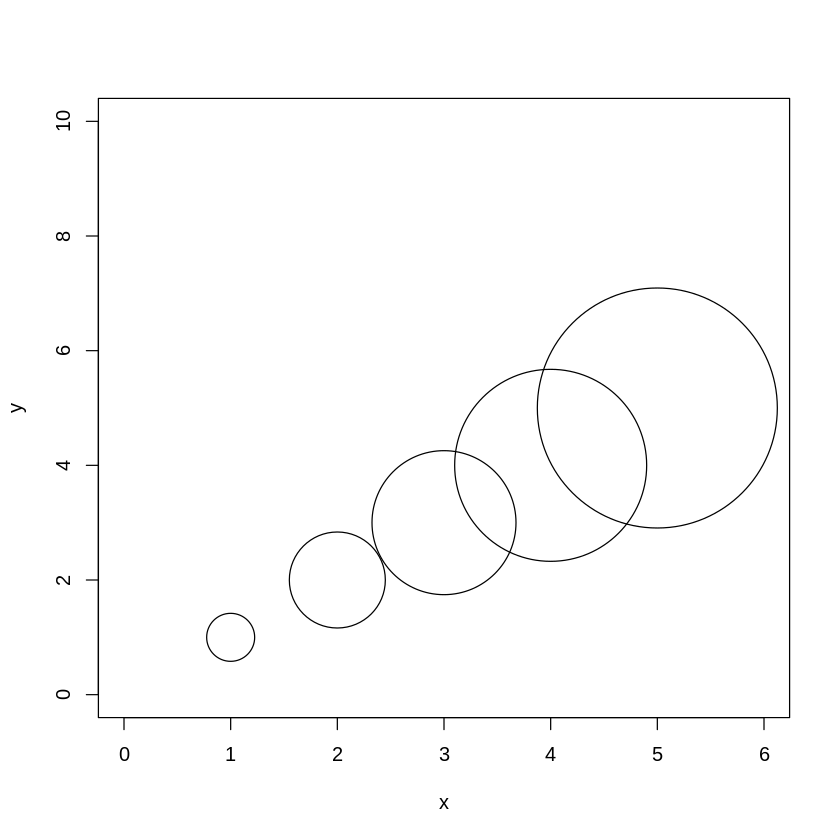

In [6]:
plot(1:5, 1:5, type = "n", xlim = c(0, 6), ylim = c(0, 10), xlab = "x", ylab = "y")
symbols(x = 1:5, y = rep(1:5), circles = c(1, 2, 3, 4, 5), inches = TRUE, add = TRUE)

3.The greatest common divisor of two numbers can be computed via: (Verify!) 

gcd = function(a, b){ if (b==0) a else gcd(b, a%%b) }

Use a similar idea of the function “gcd” to create a function “lcm” for computing the least common multiplier of two numbers.
(Bonus: Modify these functions to more than two numbers.)


In [7]:
# Verify gcd function 
gcd = function(a, b){
    if (b == 0){ 
      a
    }else{
        gcd(b, a%%b)
  } 
}
print(gcd(123, 1026))

# lcm function
 
gcd = function(x, y){ if (y == 0){
    x
    }else{
    gcd(y, x%%y)
  }
}

# method 1
lcm1 = function(x, y){
    return (x * y / gcd(x, y)) 
}

# method 2
lcm2 = function(x, y){
    if (x > y){ 
        greater = x
    }else{ 
        greater = y
  }
  while (TRUE){
    if ((greater %% x == 0) & (greater %% y == 0)){ 
        lcm = greater
        break
    }
    greater = greater + 1
    }
  return (lcm)
}

print(lcm1(12, 15))
print(lcm2(123, 1026))

[1] 3
[1] 60
[1] 42066


+ method 1: 直接使用兩數相乘除以最大公因數，即可得到最小公倍數。
+ method 2: 使用窮舉搜尋法的方式，撰寫邏輯判斷，當大的數字為小的數字的倍數時，大的數字即為最小公倍數，若否，則使用邏輯判斷，不斷的從大的數 字往上加一，直到可以整除兩數為止。

4.(a) Write a computer program using the Mid-Square Method using 6 digits to generate 10,000 random numbers ranging over [0, 999999]. Use the Kolmogorov- Smirnov Goodness-of-fit test to see if the random numbers that you create are uniformly distributed. (Note: You must notify the initial seed number used, and you may adapt 0.05 as the 𝛼 value. Also, you may find warning messages for conducting the Goodness-of-fit test, and comment on the Goodness-of-fit test.)

Warning message in ks.test(mid(k[1]), "punif"):
“ties should not be present for the Kolmogorov-Smirnov test”



	One-sample Kolmogorov-Smirnov test

data:  mid(k[1])
D = 0.9852, p-value < 0.00000000000000022
alternative hypothesis: two-sided


Warning message in ks.test(mid(k[2]), "punif"):
“ties should not be present for the Kolmogorov-Smirnov test”



	One-sample Kolmogorov-Smirnov test

data:  mid(k[2])
D = 0.0628, p-value < 0.00000000000000022
alternative hypothesis: two-sided


Warning message in ks.test(mid(k[3]), "punif"):
“ties should not be present for the Kolmogorov-Smirnov test”



	One-sample Kolmogorov-Smirnov test

data:  mid(k[3])
D = 0.42437, p-value < 0.00000000000000022
alternative hypothesis: two-sided


Warning message in ks.test(mid(k[4]), "punif"):
“ties should not be present for the Kolmogorov-Smirnov test”



	One-sample Kolmogorov-Smirnov test

data:  mid(k[4])
D = 0.051807, p-value < 0.00000000000000022
alternative hypothesis: two-sided


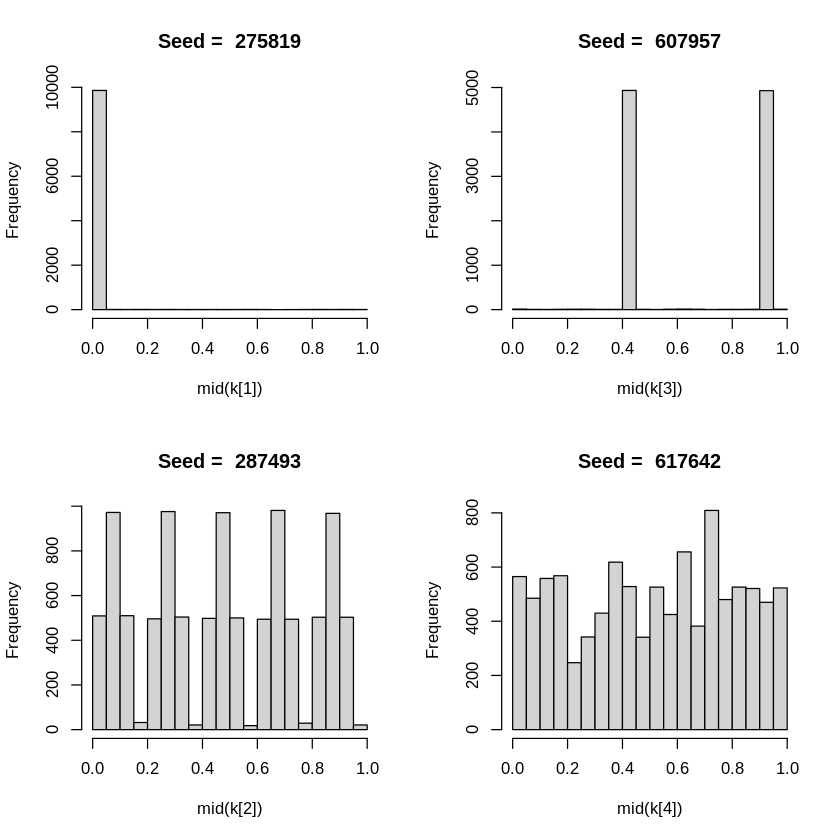

In [8]:
library(stringr)
options(scipen = 200)
k = c(275819, 287493, 607957, 617642)
par(mfcol = c(2, 2))
mid = function(s){
    ran = NULL
    for (i in 1:10000){
        num = s^2
        s = floor(as.numeric(str_sub(as.character(num), -9)) / 1000)
        ran = c(ran, s / 1000000)
    }
    return (ran)
    # hist(ran, main = paste("Seed = ", s))
}

# ks.test
# ks.test(ran, "punif")

hist(mid(k[1]), main = paste("Seed = ", k[1]))
hist(mid(k[2]), main = paste("Seed = ", k[2]))
hist(mid(k[3]), main = paste("Seed = ", k[3]))
hist(mid(k[4]), main = paste("Seed = ", k[4]))
ks.test(mid(k[1]), "punif")
ks.test(mid(k[2]), "punif")
ks.test(mid(k[3]), "punif")
ks.test(mid(k[4]), "punif")

+ 由圖與檢定結果可知，在平方取中法中，seed 的選擇對隨機數列的影響非常大，有些數字可能會造成數列中重複的數字非常多。再根據 K-S Goodness-of-fit test 檢定平方取中法的結果，顯著(under $H_0$)，代表其拒絕$H_0$，也就是拒絕此亂數的分配為均勻分布的假設。

4.(b) Similar to the above, but consider $X_{i+1} = 69069X_i \,\, (mod \,2^{32})$ i.e., the generator used by Vax before 1993. Use both the $\chi^2$ and Kolmogorov-Smirnov Goodness-of-fit tests to check if the data are from U(0,1) distribution.

Warning message in chisq.test(num1):
“Chi-squared approximation may be incorrect”



	Chi-squared test for given probabilities

data:  num1
X-squared = 1659.5, df = 9999, p-value = 1



	One-sample Kolmogorov-Smirnov test

data:  num1
D = 0.0090738, p-value = 0.3826
alternative hypothesis: two-sided


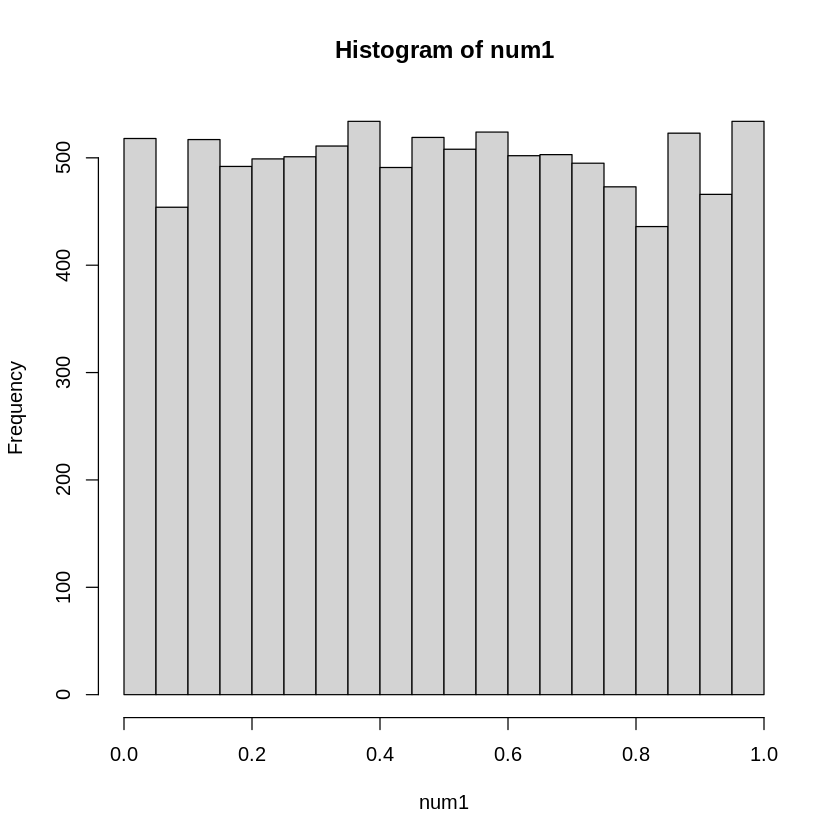

In [9]:
LCG_generator = function(seed, n){ num = seed
    s = c()
    for (i in 1:n){
        num = (num * 69069) %% (2^32)
        s[i] = num
    }
    return (s)
}

number = LCG_generator(123, 10000) 
num1 = number / (2^32)
hist(num1)
chisq.test(num1)
ks.test(num1, "punif")

+ 從直方圖來看，明顯的可以看出每個區間出現的頻率差不多，在檢定上來
看是不顯著，意即亂數的分配很接近均勻分配。

4.(c) Consider the combination of 3 multiplicative congruential generators, i.e.,

$u_i = \frac{x_i}{30269}+\frac{y_i}{30307}+\frac{z_i}{30323}\,\, (mod \, 1)$

With $x_i=171x_{i-1}(mod\,30269)$, $y_i = 172y_{i-1}(mod \,30307)$, $z_i = 170z_{i-1}(mod \, 30323)$.

Compare the result with those in (a) & (b), and discuss your findings.

Warning message in chisq.test(a):
“Chi-squared approximation may be incorrect”



	Chi-squared test for given probabilities

data:  a
X-squared = 1665.9, df = 9999, p-value = 1



	One-sample Kolmogorov-Smirnov test

data:  a
D = 0.0082864, p-value = 0.4983
alternative hypothesis: two-sided


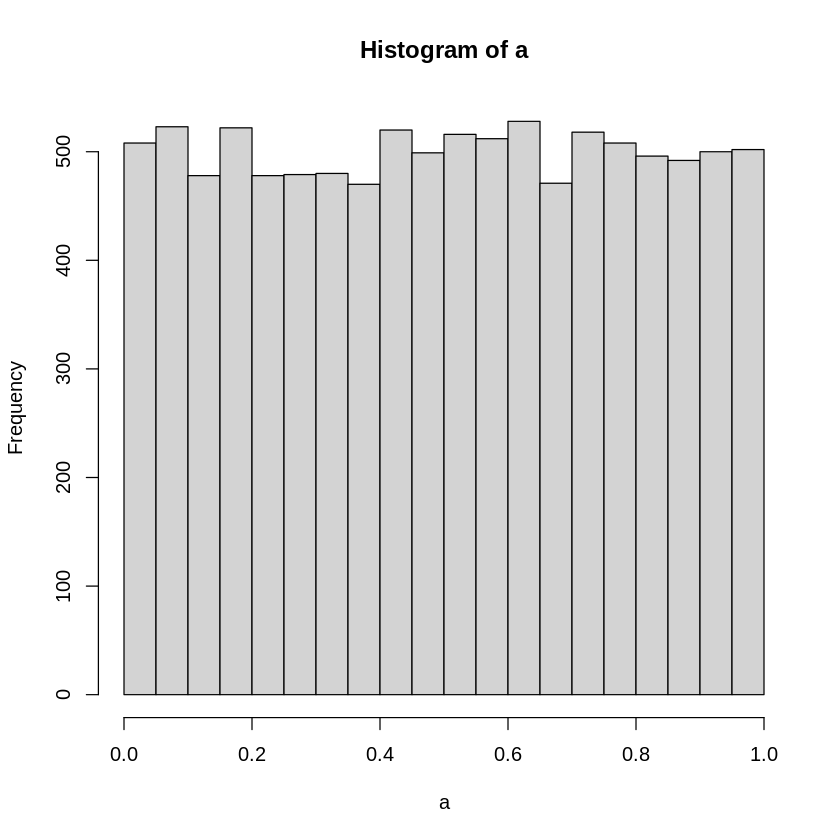

In [10]:
combination = function(x, y, z, n){ 
    x=x
    y=y
    z=z
    u = c()
    for (i in 1:n){
        x = (171 * x) %% 30269
        y = (172 * y) %% 30307
        z = (170 * z) %% 30323
        u[i] = ((x / 30269) + (y / 30307) + (z / 30323)) %% 1
    }
    return (u) 
}

a = combination(x = 11, y = 13, z = 17, n = 10000) 
hist(a)
chisq.test(a)
ks.test(a, "punif")

+ (c)小題不管在圖形上還是檢定上，都可以看出其所生成的隨機數列很有可
能服從均勻分配。相較於(a)小題之結果，此方法明顯較好;而相較於(b)小題，從 k-s test 來看，此方法的檢定結果又稍微較比(c)來的更不顯著，也就是數列更像是服從均勻分配。

5.(a) In class, we often use simulation tools in R, e.g., “sample” or “ceiling(runif),” to generate random numbers from 1 to k, where k is a natural number. Using graphical tools (such as histogram) and statistical tests to check which one is a better tool in producing uniform numbers between 1 and k. (Hint: You may check if the size of k matters by, for example, assigning k a small and big value.)

Warning message in ks.test(sam_100, "punif"):
“ties should not be present for the Kolmogorov-Smirnov test”



	One-sample Kolmogorov-Smirnov test

data:  sam_100
D = 1, p-value < 0.00000000000000022
alternative hypothesis: two-sided



	Chi-squared test for given probabilities

data:  sam_100
X-squared = 3228, df = 199, p-value < 0.00000000000000022



	One-sample Kolmogorov-Smirnov test

data:  ru_100
D = 1, p-value < 0.00000000000000022
alternative hypothesis: two-sided



	Chi-squared test for given probabilities

data:  ru_100
X-squared = 3474.5, df = 199, p-value < 0.00000000000000022


Warning message in ks.test(sam_1000, "punif"):
“ties should not be present for the Kolmogorov-Smirnov test”



	One-sample Kolmogorov-Smirnov test

data:  sam_1000
D = 1, p-value < 0.00000000000000022
alternative hypothesis: two-sided



	Chi-squared test for given probabilities

data:  sam_1000
X-squared = 34708, df = 199, p-value < 0.00000000000000022



	One-sample Kolmogorov-Smirnov test

data:  ru_1000
D = 1, p-value < 0.00000000000000022
alternative hypothesis: two-sided



	Chi-squared test for given probabilities

data:  ru_1000
X-squared = 33322, df = 199, p-value < 0.00000000000000022


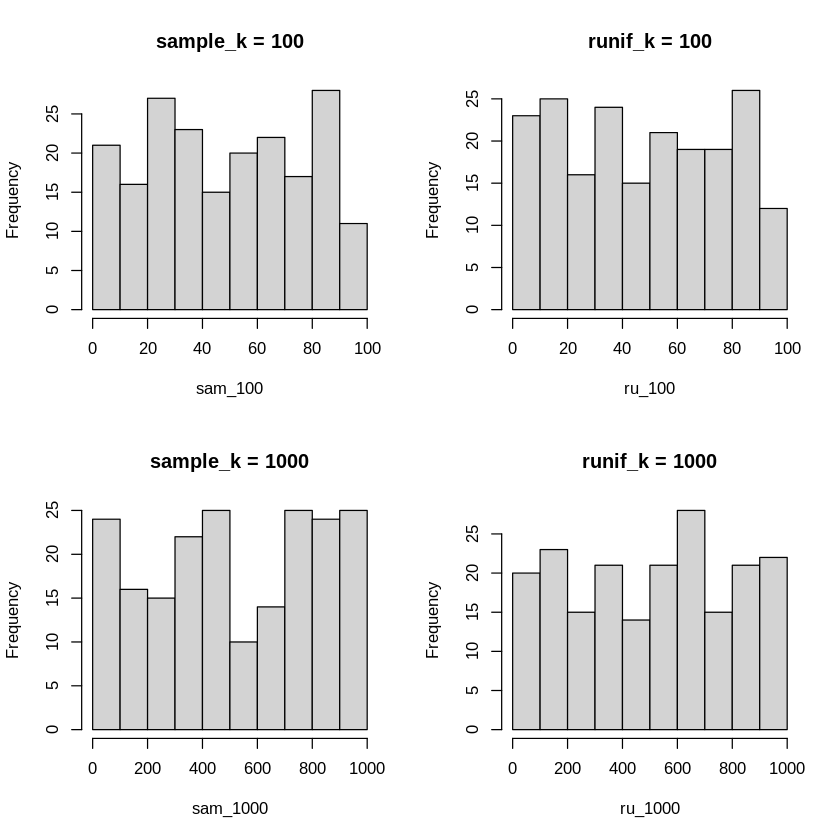

In [11]:
set.seed(456) 
sam_100 = sample(1:100,200,replace=TRUE) 
ru_100 = runif(200,1,100) 
sam_1000 = sample(1:1000,200,replace=TRUE) 
ru_1000 = runif(200,1,1000)

# plot
par(mfrow = c(2, 2))
hist(sam_100, main = "sample_k = 100")
hist(ru_100, main = "runif_k = 100")
hist(sam_1000, main = "sample_k = 1000")
hist(ru_1000, main = "runif_k = 1000")

# test
ks.test(sam_100 ,"punif")
chisq.test(sam_100)

ks.test(ru_100 ,"punif")
chisq.test(ru_100)

ks.test(sam_1000 ,"punif")
chisq.test(sam_1000)

ks.test(ru_1000 ,"punif")
chisq.test(ru_1000)

+ 依據圖的結果可發現，在相同 k 之下，sample 函數所生成之隨機數列，看
起來較 runif 來的更像均勻分配;而在同一方法下，k 越大，可以觀察到，較大 的 k 所產生的隨機數列較均勻。
+ 從統計檢定的結果可以發現，兩種方法，不管 k 較大還是較小，檢定結果都是顯著拒絕$H_0$，也就是兩者皆不服從均勻分配。

5.(b) In addition to $U_{n+1} = (\pi + U_n)^5\, (mod\,1)$, we can use $\phi = \frac{1+\sqrt{5}}{2}$) (the golden &
ratio) or other irrational numbers to replace the value of $\pi$, to generate random numbers between 0 and 1. Using graphical tools (such as histogram) and statistical tests to check if $\pi$ or $\phi$ has a better performance in producing uniform numbers between 0 and 1.


Warning message in chisq.test(a):
“Chi-squared approximation may be incorrect”



	Chi-squared test for given probabilities

data:  a
X-squared = 1682.8, df = 9999, p-value = 1


Warning message in chisq.test(b):
“Chi-squared approximation may be incorrect”



	Chi-squared test for given probabilities

data:  b
X-squared = 1635.8, df = 9999, p-value = 1


Warning message in chisq.test(c):
“Chi-squared approximation may be incorrect”



	Chi-squared test for given probabilities

data:  c
X-squared = 1670.1, df = 9999, p-value = 1



	One-sample Kolmogorov-Smirnov test

data:  a
D = 0.0072493, p-value = 0.6694
alternative hypothesis: two-sided



	One-sample Kolmogorov-Smirnov test

data:  b
D = 0.012327, p-value = 0.09576
alternative hypothesis: two-sided



	One-sample Kolmogorov-Smirnov test

data:  c
D = 0.0074047, p-value = 0.6432
alternative hypothesis: two-sided


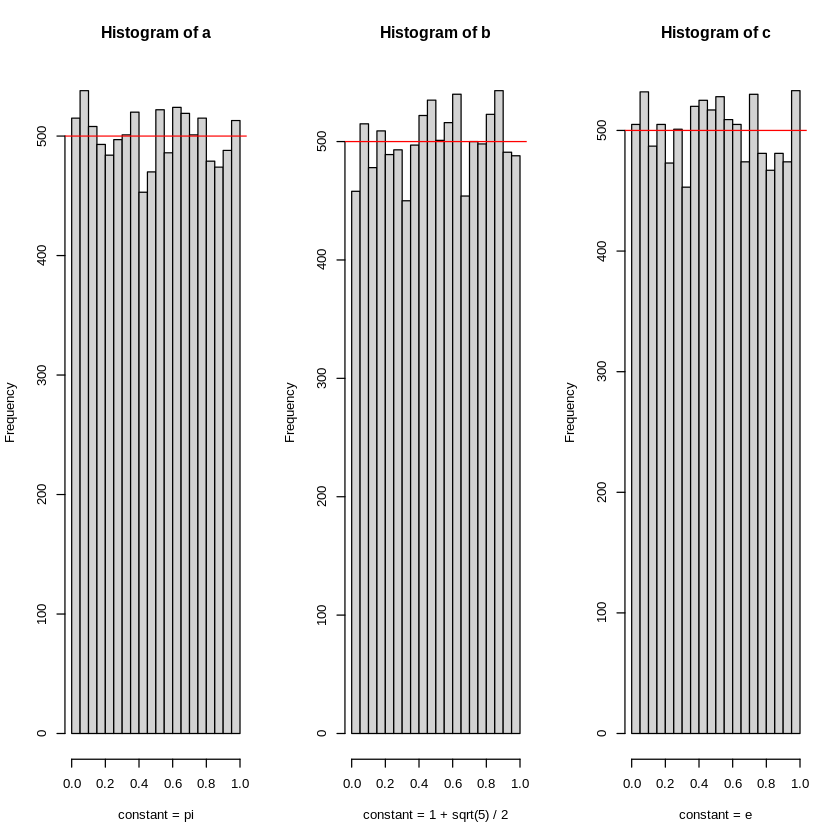

In [12]:
generator = function(seed, constant, n){ 
    num = seed
    s = c()
    for (i in 1:n){
        num = ((constant + num)^5) %% 1
        s[i] = num 
    }
    return (s) 
}
a = generator(seed = 123, constant = pi, n = 10000)
b = generator(seed = 123, constant = ((1 + sqrt(5)) / 2), n = 10000)
c = generator(seed = 123, constant = exp(1), n = 10000)

par(mfrow = c(1, 3))
hist(a, breaks = 20, xlab = "constant = pi")
abline(h = 500, col = "red")
hist(b, breaks = 20, xlab = "constant = 1 + sqrt(5) / 2") 
abline(h = 500, col = "red")
hist(c, breaks = 20, xlab = "constant = e") 
abline(h = 500, col = "red")

chisq.test(a) 
chisq.test(b) 
chisq.test(c) 

ks.test(a, "punif") 
ks.test(b, "punif") 
ks.test(c, "punif")

+ 多測試了一個無理數e，在設定相同 seed 和在圖形上，除去常數為$\phi$在圖形
上的表現比較不像均勻以外，另外兩者的表現比較像均勻分配，從檢定結果上來看，三者均不顯著，顯示能不拒絕亂數的分配為均勻分配的假設，表現都還不錯。

6. Fibonacci numbers, defined as $X_{n+1} = X_n + X_{n-1}\,(mod\,1)$, is another way of generating random numbers. The usual setting is letting m = 1 and see if ($X_i$)'s are a sequence of random numbers from U(0,1). However, $X_n < X_{n+1} < X_{n-1}$ and
$X_{n-1} < X_{n+1} < X_n$ never appear under this setting. In general, the performances of Fibonacci numbers would be close to “random” as m increases. Write a program to generate Fibonacci numbers and test if they are “good” random numbers given varies choices of m. (Note: You could simulate 10,000 random numbers, and use goodness-of-tests & independence tests to evaluate Fibonacci numbers.)

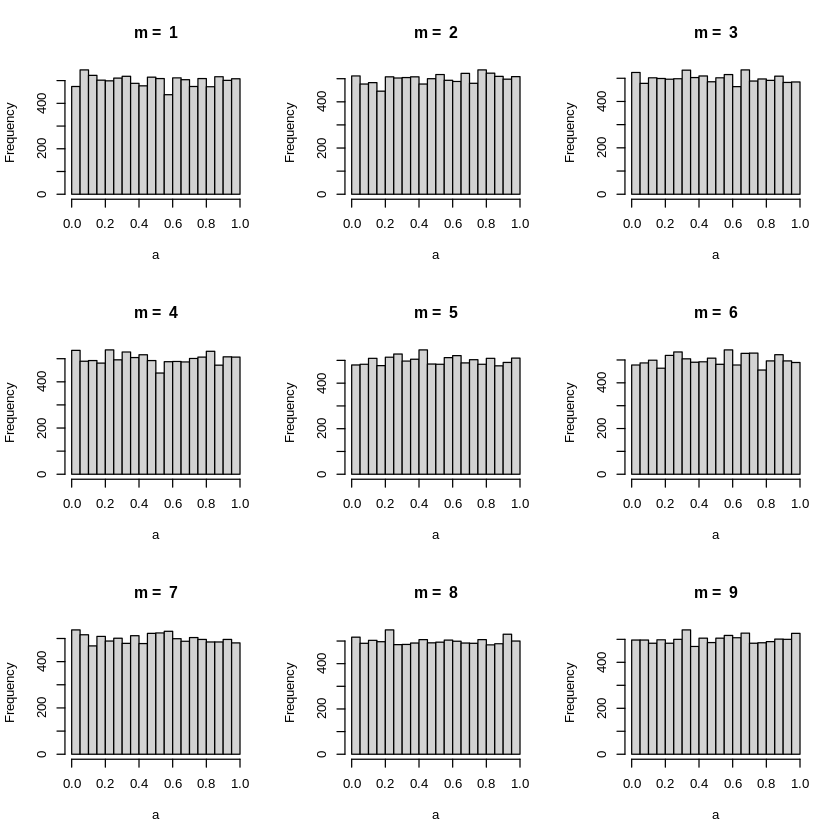

 [1] 0.4904332 0.5306221 0.4472102 0.5231907 0.5223178 0.4992563 0.5286894
 [8] 0.4885634 0.4912085 0.5188577 0.4845647 0.4942552 0.5111026 0.4741307
[15] 0.4986718 0.5216408 0.4490502 0.4668644 0.5327577 0.4936125 0.5103427
[22] 0.4746507 0.4781992 0.4996586 0.4900296 0.5019419 0.5005939 0.5155359
[29] 0.4949045 0.4702870


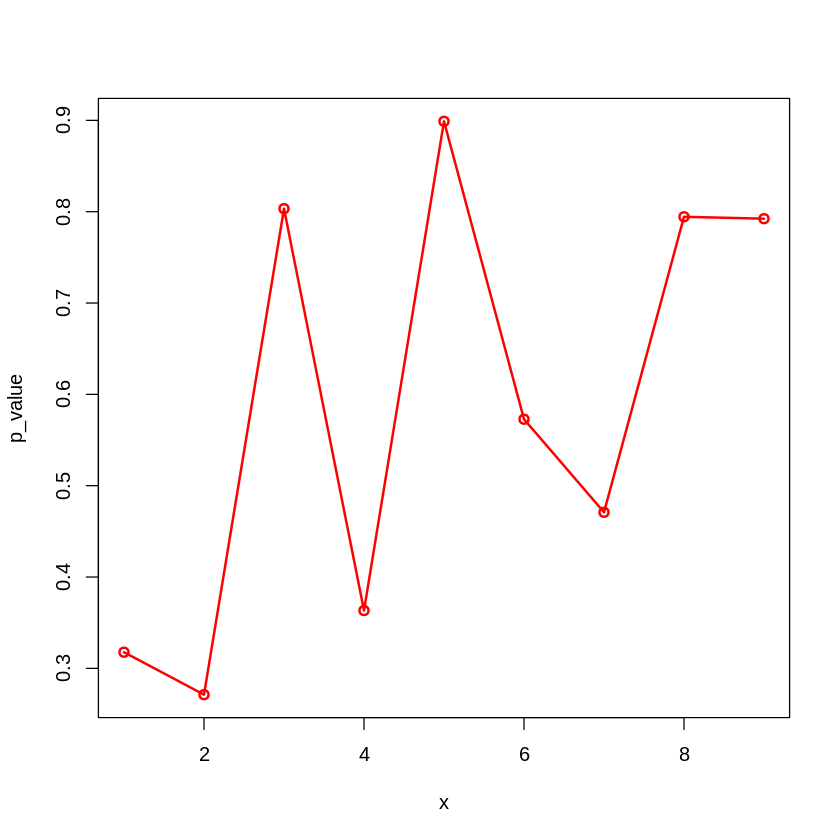

        [,1]      [,2]      [,3]        [,4]     [,5]      [,6]      [,7]     
p.value 0.8315557 0.9955594 0.001658273 0.511354 0.9775926 0.2876748 0.2092508
        [,8]      [,9]       [,10]     [,11]      [,12]     [,13]     [,14]    
p.value 0.7213457 0.07026834 0.6290471 0.02143636 0.6614704 0.9313069 0.9713131
        [,15]     [,16]     [,17]     [,18]     [,19]     [,20]     [,21]    
p.value 0.8984709 0.6565023 0.7940716 0.7506163 0.7058142 0.1311079 0.0270743
        [,22]     [,23]     [,24]      [,25]       [,26]     [,27]    
p.value 0.3884112 0.6334208 0.08549871 0.008635049 0.7091442 0.2322713
        [,28]     [,29]   [,30]    
p.value 0.2510521 0.34697 0.1431113


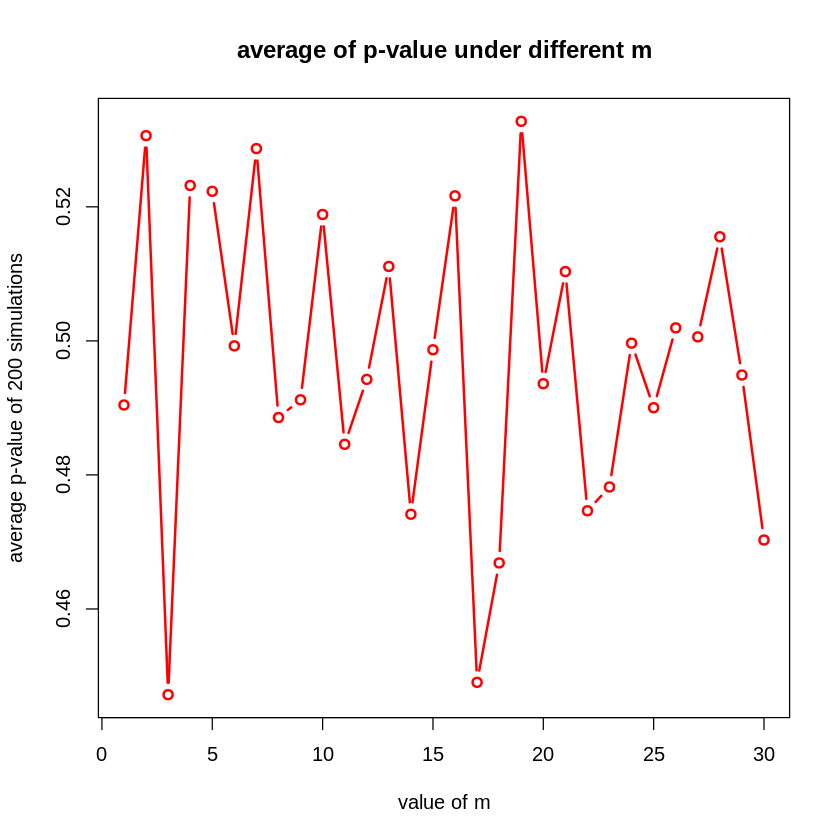

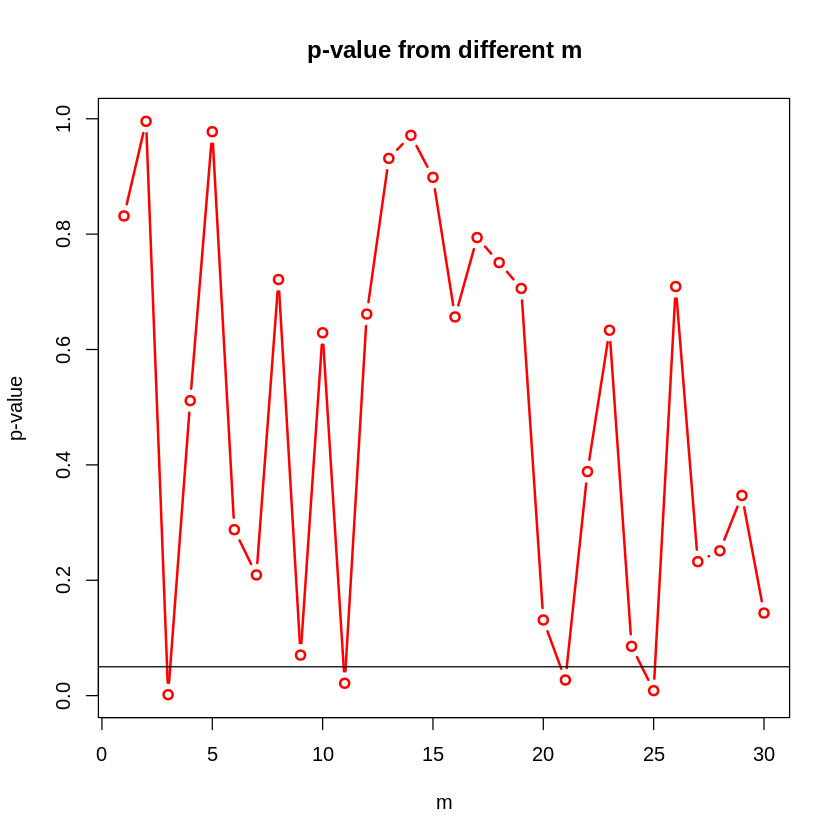

In [13]:
options(warn = -1)
fib_num = function(m, n){ 
    s = c()
    num = m
    for (i in 1:n){
        if (i <= m+1){ 
            s[i] = runif(1)
        }else{
            s[i] = (s[i - 1] + s[i - (m + 1)]) %% 1
        } 
    }
    return (s) 
}

par(mfrow = c(3, 3))
a = NULL
x = c(1:9)
p_value = c()
for (i in 1:9){
    a = fib_num(x[i], 10000)
    hist(a, main = paste("m = ", x[i]))
    p_value[i] = ks.test(a, "punif")[2]
}

par(mfrow = c(1, 1))
plot(x, p_value, type = "o", col = "red", lwd = 2)
abline(h = 0.05)

m = 1:30
table = NULL
for (i in 1:length(m)){
    a = NULL
    b = NULL
    for (j in 1:200){
        a = fib_num(m[i], 10000)
        b = cbind(b, ks.test(a, "punif")[2])
    }
    b = unlist(b)
    table = cbind(table, b)
}

ave = c()
for (i in 1:30){
    ave[i] = mean(table[, i])
}
print(ave)

plot(x = 1:30, y = ave, xlab = "value of m", ylab = "average p-value of 200 simulations", main = "average of p-value under different m", type = "b", lwd = 2, col = "red")
abline(h = 0.05)

Fibo = function(m){
    set.seed(123)
    s = runif(m + 1)
    seed = tail(s, 1)
    ran6 = NULL
    for (i in 1:10000){
        ran6 = c(ran6, seed)
        seed = (s[i] + seed) %% 1
        s = c(s, seed)
    }
    x = matrix(ran6[-1], ncol = 3333, byrow = FALSE)
    y1 = apply(x, 2, rank)
    y2 = y1[1, ] * 100 + y1[2, ] * 10 + y1[3, ]
    y3 = table(y2)
    return (chisq.test(y3)[3])
}
p_value = NULL
for (i in 1:30){
    p_value = cbind(p_value, Fibo(i))
}
print(p_value)
p_value = unlist(p_value)

plot(p_value, type = "b", col = "red", lwd = 2, xlab = "m", ylab = "p-value", main = "p-value from different m")
abline(h = 0.05)

+ 模擬 m = 1 ~ 9 的所生成的亂數，在直方圖下看大致表現都很不錯，很接近
均勻分配，且分別計算了 9 個 ks.test 的 p-value 繪製成折線圖，但是只模擬 一次的話可能會出現極端的狀況，我們應該用多次模擬的表現來下結論，於是 接下來我們模擬了在 m = 1~30 下，各做 200 次模擬以及檢定，並利用兩百 次所得的兩百個 p-value 對其取平均，找到一個平均的 p-value，如第一張圖。

+ 在 m = 1 ~ 30 的情況下，獨立性檢定的表現就沒有如檢定是否服從均勻分
配的表現一般，幾乎是穩定的不拒絕，在獨立性上 m 的取值經過模擬推測不 會保證 m 越大表現越好，見第二張圖。

In [15]:
x = fib_num(1, 10000)
x = x[-10000]
mat = matrix(x, nrow = 3, byrow = FALSE)
mat = apply(mat, 2, rank)
y = mat[1, ] * 100 + mat[2, ] * 10 + mat[3, ]
table(y)

y
123 213 231 321 
797 853 843 840 

+ 經過驗證，使用 Fibonacci 產生的亂數的確不會有 $X_n < X_{n+1} < X_{n-1} $ 和 $X_{n-1} < X_{n+1} < X_n$ 的情況出現。